***
## 강사 소개<br>
<img src="./IMG/i.png" width = 25% style="float: left; margin-right: 10%">


* 이름(메일): **백관구(bouguereau1130@gmail.com)**


* 소속: 서울대 지구환경과학부 대기과학전공 석박통합과정 4 년


* 분야: 머신러닝(딥러닝) | 공간정보학(고해상도 자료 생산 알고리즘)


* 언어: **파이썬** (5 년차)

***
## 3. Pandas 패키지 활용<br>
### (1) 자료 구조: Series & DataFrame<br>
<img src="./IMG/pd1.png" width = "75%" style="float: left">

### (예제) Series

In [1]:
import pandas as pd

print(pd.__version__)

1.1.0


In [2]:
pr = [95, 45, 74, 100]
series = pd.Series(pr)

print(series)

0     95
1     45
2     74
3    100
dtype: int64


In [3]:
idx = ["Seoul", "Tokyo", "Beijing", "Singapore"]
series = pd.Series(pr, index = idx)

print(series)

Seoul         95
Tokyo         45
Beijing       74
Singapore    100
dtype: int64


In [4]:
pr_dict = {"Seoul": 95, "Tokyo": 45, "Beijing": 74, "Singapore": 100}
series = pd.Series(pr_dict)

print(series)

Seoul         95
Tokyo         45
Beijing       74
Singapore    100
dtype: int64


In [5]:
print(series["Seoul"])

95


In [6]:
import numpy as np

pr_today = pd.Series({"Seoul": 95, "Tokyo": 45, "New York": np.nan, "Beijing": 74, "Singapore": 100})
pr_yesterday = pd.Series({"Seoul": 80, "Tokyo": 40, "Beijing": 92, "New York": 95})

print(pr_today + pr_yesterday)

Beijing      166.0
New York       NaN
Seoul        175.0
Singapore      NaN
Tokyo         85.0
dtype: float64


***
<img src="./IMG/pd2.png" width="80%" style="float: left">

### (예제) DataFrame

In [7]:
pr_yesterday = [80, 40, 92]
pr_today = [95, 45, 74]
country = ["South Korea", "Japan", "China"]
cities = ["Seoul", "Tokyo", "Beijing"]

df = pd.DataFrame([pr_yesterday,\
                   pr_today,\
                   country],\
                   index = ["08-24", "08-25", "country"], columns = cities)

print(df)

               Seoul  Tokyo Beijing
08-24             80     40      92
08-25             95     45      74
country  South Korea  Japan   China


In [8]:
df["Seoul"]["08-24"]

80

In [9]:
df.loc["08-24", "Seoul"]

80

In [10]:
new_df = pd.DataFrame({"Paris": [20, 0, "France"]}, index = ["08-23", "08-24", "country"])

print(new_df)

          Paris
08-23        20
08-24         0
country  France


In [11]:
update_df = pd.merge(df, new_df, left_index = True, right_index = True, how = "outer")

print(update_df)

               Seoul  Tokyo Beijing   Paris
08-23            NaN    NaN     NaN      20
08-24             80     40      92       0
08-25             95     45      74     NaN
country  South Korea  Japan   China  France


In [12]:
print(pd.merge(df, new_df, left_index = True, right_index = True, how = "inner"))

               Seoul  Tokyo Beijing   Paris
08-24             80     40      92       0
country  South Korea  Japan   China  France


In [13]:
print(pd.merge(df, new_df, left_index = True, right_index = True, how = "left"))

               Seoul  Tokyo Beijing   Paris
08-24             80     40      92       0
08-25             95     45      74     NaN
country  South Korea  Japan   China  France


In [14]:
print(pd.merge(df, new_df, left_index = True, right_index = True, how = "right"))

               Seoul  Tokyo Beijing   Paris
08-23            NaN    NaN     NaN      20
08-24             80     40      92       0
country  South Korea  Japan   China  France


In [15]:
update_df["Rome"] = [10, 0, 0, "Italy"]

print(update_df)

               Seoul  Tokyo Beijing   Paris   Rome
08-23            NaN    NaN     NaN      20     10
08-24             80     40      92       0      0
08-25             95     45      74     NaN      0
country  South Korea  Japan   China  France  Italy


In [16]:
new_df = pd.DataFrame({"Seoul": [70, 0], "Beijing": [50, 10]}, index = ["08-26", "08-27"])

print(new_df)

       Seoul  Beijing
08-26     70       50
08-27      0       10


In [17]:
add_df = pd.concat([update_df, new_df], axis = 0)

print(add_df)

               Seoul  Tokyo Beijing   Paris   Rome
08-23            NaN    NaN     NaN      20     10
08-24             80     40      92       0      0
08-25             95     45      74     NaN      0
country  South Korea  Japan   China  France  Italy
08-26             70    NaN      50     NaN    NaN
08-27              0    NaN      10     NaN    NaN


In [18]:
print(add_df.sort_index(axis = 0, ascending = True))

               Seoul  Tokyo Beijing   Paris   Rome
08-23            NaN    NaN     NaN      20     10
08-24             80     40      92       0      0
08-25             95     45      74     NaN      0
08-26             70    NaN      50     NaN    NaN
08-27              0    NaN      10     NaN    NaN
country  South Korea  Japan   China  France  Italy


### (2) 자료 불러오기<br>
<img src="./IMG/pd3.png" width="80%" style="float: left">

### (예제)

In [19]:
air = pd.read_csv("station.csv", na_values = 999.9, index_col = "YEAR")

air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1905 to 2020
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     116 non-null    float64
 1   FEB     116 non-null    float64
 2   MAR     116 non-null    float64
 3   APR     114 non-null    float64
 4   MAY     115 non-null    float64
 5   JUN     113 non-null    float64
 6   JUL     114 non-null    float64
 7   AUG     114 non-null    float64
 8   SEP     112 non-null    float64
 9   OCT     113 non-null    float64
 10  NOV     114 non-null    float64
 11  DEC     114 non-null    float64
 12  D-J-F   116 non-null    float64
 13  M-A-M   115 non-null    float64
 14  J-J-A   114 non-null    float64
 15  S-O-N   113 non-null    float64
 16  metANN  114 non-null    float64
dtypes: float64(17)
memory usage: 16.3 KB


In [20]:
print(air.head())

       JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT   NOV  \
YEAR                                                                            
1905  1.28 -2.72  4.38   8.98  14.18  19.78  23.78  23.38  19.88  14.48  6.18   
1906 -4.02 -3.42  2.48   9.58  14.98  20.68  24.28  24.48  20.08  14.58  4.08   
1907 -0.12 -3.12  3.28  10.28  14.48  19.38  23.58  25.58  21.28  15.78  6.38   
1908 -2.92 -3.32  2.68   9.78  14.38  19.48  22.78  24.28  20.48  15.38  5.18   
1909 -1.82 -2.42  1.88   9.88  14.38  19.18  23.68  25.18  20.98  13.88  6.78   

       DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
YEAR                                            
1905  1.48  -0.11   9.18  22.31  13.51   11.22  
1906 -0.72  -1.99   9.01  23.15  12.91   10.77  
1907 -2.52  -1.32   9.35  22.85  14.48   11.34  
1908  0.78  -2.92   8.95  22.18  13.68   10.47  
1909 -2.22  -1.15   8.71  22.68  13.88   11.03  


In [21]:
print(air.head(3))

       JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT   NOV  \
YEAR                                                                            
1905  1.28 -2.72  4.38   8.98  14.18  19.78  23.78  23.38  19.88  14.48  6.18   
1906 -4.02 -3.42  2.48   9.58  14.98  20.68  24.28  24.48  20.08  14.58  4.08   
1907 -0.12 -3.12  3.28  10.28  14.48  19.38  23.58  25.58  21.28  15.78  6.38   

       DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
YEAR                                            
1905  1.48  -0.11   9.18  22.31  13.51   11.22  
1906 -0.72  -1.99   9.01  23.15  12.91   10.77  
1907 -2.52  -1.32   9.35  22.85  14.48   11.34  


In [22]:
print(air.tail())

       JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT   NOV  \
YEAR                                                                            
2016 -2.09  0.96  6.66  13.26  18.61  22.31  25.46  27.66  23.16  16.26  7.41   
2017 -0.71  0.34  6.34  12.89  18.09  22.04  26.14  25.64  21.94  15.94  6.04   
2018 -3.63 -1.63  7.27  12.22  17.17  21.67  26.92  28.32  21.72  14.02  8.67   
2019 -0.25  1.15  6.85  11.75  18.05  21.75  25.25  27.15  22.75  16.90  8.35   
2020  2.10  2.80  7.25    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   

       DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
YEAR                                            
2016  2.14   0.43  12.84  25.14  15.61   13.51  
2017 -1.33   0.59  12.44  24.61  14.64   13.07  
2018 -0.05  -2.20  12.22  25.64  14.80   12.62  
2019  1.90   0.28  12.22  24.72  16.00   13.30  
2020   NaN   2.27    NaN    NaN    NaN     NaN  


In [23]:
print(air.shape)

(116, 17)


In [24]:
print(air.columns)

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC', 'D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'],
      dtype='object')


In [25]:
print(air.index)

Int64Index([1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914,
            ...
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='YEAR', length=116)


In [26]:
print(air.describe())

              JAN         FEB         MAR         APR         MAY         JUN  \
count  116.000000  116.000000  116.000000  114.000000  115.000000  113.000000   
mean    -2.897414   -0.794224    4.277759   10.692018   16.023739   20.500354   
std      2.080135    1.896799    1.634224    1.277149    1.123928    0.923854   
min     -7.740000   -4.460000    0.120000    8.260000   12.950000   17.840000   
25%     -4.235000   -2.420000    3.347500    9.772500   15.375000   19.840000   
50%     -3.030000   -0.840000    4.355000   10.525000   15.950000   20.460000   
75%     -1.590000    0.655000    5.302500   11.407500   16.755000   21.150000   
max      2.100000    4.050000    7.510000   14.300000   18.610000   22.700000   

              JUL         AUG         SEP         OCT         NOV         DEC  \
count  114.000000  114.000000  112.000000  113.000000  114.000000  114.000000   
mean    24.135263   25.415439   20.916161   14.754690    7.194211   -0.029211   
std      1.128443    1.0784

In [27]:
print(air.sort_values(by = "metANN").head()) # 연평균 기온 기준으로 오름차순 정렬

       JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT   NOV  \
YEAR                                                                            
1936 -7.48 -3.68  0.12   8.82  15.02  20.32  23.22  23.22  21.02  14.62  6.82   
1947 -3.06 -4.46  1.74  10.14  14.64  17.84  22.54  25.04  20.14  12.84  4.44   
1913 -4.31 -3.32  1.78  10.48  13.78  18.88  21.48  23.78  20.38  14.38  6.58   
1945 -6.55 -4.15  2.25   9.95  12.95    NaN  22.95  25.25  21.65  14.25  9.35   
1957 -2.82 -3.65  0.45  10.25  16.21  19.66  22.22  24.31  19.59  13.47  9.40   

       DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
YEAR                                            
1936  0.41  -4.71   7.99  22.25  14.15    9.92  
1947 -4.47  -3.43   8.84  21.81  12.47    9.92  
1913 -0.72  -3.15   8.68  21.38  13.78   10.17  
1945 -0.35  -4.98   8.38  22.68  15.08   10.29  
1957  0.42  -3.58   8.97  22.06  14.15   10.40  


In [28]:
print(air.loc[2000 : 2010, "JAN"])

YEAR
2000   -3.02
2001   -4.60
2002    0.31
2003   -3.31
2004   -1.54
2005   -0.82
2006   -0.67
2007    0.71
2008   -1.74
2009   -1.13
2010   -3.46
Name: JAN, dtype: float64


In [29]:
print(air[air["D-J-F"] >= 1])

       JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT   NOV  \
YEAR                                                                            
1949 -1.59  2.10  4.17  10.45  16.35  20.65  25.76  27.13  22.24  15.74  8.55   
1959 -4.25  2.58  6.29  10.50  17.59  20.31  24.31  26.21  21.47  16.00  6.51   
1979  1.24  0.96  6.08  10.74  15.99  20.88  24.12  25.36  19.97  16.13  6.45   
1989  0.53  2.44  5.54  13.01  16.66  20.46  24.18  25.25  20.60  13.85  7.57   
1998 -1.06  2.89  6.63  14.30  17.94  20.91  24.42  25.33  23.03  17.29  7.59   
2007  0.71  4.05  5.86  11.31  16.29  21.83  22.70  25.57  21.60  15.24  7.54   
2009 -1.13  2.76  6.11  11.97  17.66  21.24  23.58  25.19  21.40  16.01  7.31   
2020  2.10  2.80  7.25    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   

       DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
YEAR                                            
1949 -0.27   1.71  10.32  24.51  15.51   13.01  
1959  1.50   1.08  11.46  23.61  14.66   1

In [30]:
print(air[(air["D-J-F"] >= 1) & (air["M-A-M"] >= 11)])

       JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT   NOV  \
YEAR                                                                            
1959 -4.25  2.58  6.29  10.50  17.59  20.31  24.31  26.21  21.47  16.00  6.51   
1989  0.53  2.44  5.54  13.01  16.66  20.46  24.18  25.25  20.60  13.85  7.57   
1998 -1.06  2.89  6.63  14.30  17.94  20.91  24.42  25.33  23.03  17.29  7.59   
2007  0.71  4.05  5.86  11.31  16.29  21.83  22.70  25.57  21.60  15.24  7.54   
2009 -1.13  2.76  6.11  11.97  17.66  21.24  23.58  25.19  21.40  16.01  7.31   

       DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
YEAR                                            
1959  1.50   1.08  11.46  23.61  14.66   12.70  
1989  1.59   1.18  11.74  23.30  14.01   12.55  
1998  2.39   1.19  12.96  23.55  15.97   13.42  
2007  2.24   2.24  11.15  23.37  14.79   12.89  
2009 -0.16   1.12  11.91  23.34  14.91   12.82  


In [31]:
print(air[(air["D-J-F"] >= 1) & (air["M-A-M"] >= 11)].index)

Int64Index([1959, 1989, 1998, 2007, 2009], dtype='int64', name='YEAR')


***
### (3) 그룹 연산(Groupby)<br>
<img src="./IMG/pd4.png" width="80%" style="float: left">

### (예제)

In [32]:
table = air.describe()

Q1 = table["metANN"]["25%"]
Q3 = table["metANN"]["75%"]

print(Q1, Q3)

11.075 12.23


In [33]:
level = np.where(np.isnan(air["metANN"]), "NaN",\
                 np.where(air["metANN"] < Q1, "cold",\
                          np.where(air["metANN"] > Q3, "hot",\
                                   "plain")))

print(level)

['plain' 'cold' 'plain' 'cold' 'cold' 'cold' 'cold' 'cold' 'cold' 'plain'
 'cold' 'plain' 'cold' 'cold' 'plain' 'plain' 'plain' 'plain' 'cold'
 'plain' 'cold' 'cold' 'cold' 'cold' 'cold' 'plain' 'cold' 'plain' 'cold'
 'cold' 'plain' 'cold' 'plain' 'plain' 'plain' 'cold' 'plain' 'plain'
 'plain' 'plain' 'cold' 'plain' 'cold' 'plain' 'hot' 'NaN' 'plain' 'plain'
 'plain' 'plain' 'plain' 'cold' 'cold' 'plain' 'hot' 'hot' 'plain' 'plain'
 'plain' 'hot' 'plain' 'plain' 'plain' 'cold' 'plain' 'plain' 'plain'
 'plain' 'plain' 'cold' 'hot' 'plain' 'plain' 'hot' 'hot' 'plain' 'cold'
 'hot' 'plain' 'plain' 'plain' 'cold' 'plain' 'plain' 'hot' 'hot' 'plain'
 'plain' 'plain' 'hot' 'plain' 'plain' 'hot' 'hot' 'hot' 'plain' 'hot'
 'plain' 'hot' 'hot' 'hot' 'hot' 'hot' 'hot' 'hot' 'plain' 'plain' 'plain'
 'plain' 'hot' 'hot' 'hot' 'hot' 'hot' 'hot' 'NaN']


In [34]:
air["LEVEL"] = level

print(air)

       JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT   NOV  \
YEAR                                                                            
1905  1.28 -2.72  4.38   8.98  14.18  19.78  23.78  23.38  19.88  14.48  6.18   
1906 -4.02 -3.42  2.48   9.58  14.98  20.68  24.28  24.48  20.08  14.58  4.08   
1907 -0.12 -3.12  3.28  10.28  14.48  19.38  23.58  25.58  21.28  15.78  6.38   
1908 -2.92 -3.32  2.68   9.78  14.38  19.48  22.78  24.28  20.48  15.38  5.18   
1909 -1.82 -2.42  1.88   9.88  14.38  19.18  23.68  25.18  20.98  13.88  6.78   
...    ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...   
2016 -2.09  0.96  6.66  13.26  18.61  22.31  25.46  27.66  23.16  16.26  7.41   
2017 -0.71  0.34  6.34  12.89  18.09  22.04  26.14  25.64  21.94  15.94  6.04   
2018 -3.63 -1.63  7.27  12.22  17.17  21.67  26.92  28.32  21.72  14.02  8.67   
2019 -0.25  1.15  6.85  11.75  18.05  21.75  25.25  27.15  22.75  16.90  8.35   
2020  2.10  2.80  7.25    Na

In [35]:
print(air[["metANN", "LEVEL"]])

      metANN  LEVEL
YEAR               
1905   11.22  plain
1906   10.77   cold
1907   11.34  plain
1908   10.47   cold
1909   11.03   cold
...      ...    ...
2016   13.51    hot
2017   13.07    hot
2018   12.62    hot
2019   13.30    hot
2020     NaN    NaN

[116 rows x 2 columns]


In [36]:
group = air.groupby("LEVEL")

print(group.groups)

{'NaN': [1950, 2020], 'cold': [1906, 1908, 1909, 1910, 1911, 1912, 1913, 1915, 1917, 1918, 1923, 1925, 1926, 1927, 1928, 1929, 1931, 1933, 1934, 1936, 1940, 1945, 1947, 1956, 1957, 1968, 1974, 1981, 1986], 'hot': [1949, 1959, 1960, 1964, 1975, 1978, 1979, 1982, 1989, 1990, 1994, 1997, 1998, 1999, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2014, 2015, 2016, 2017, 2018, 2019], 'plain': [1905, 1907, 1914, 1916, 1919, 1920, 1921, 1922, 1924, 1930, 1932, 1935, 1937, 1938, 1939, 1941, 1942, 1943, 1944, 1946, 1948, 1951, 1952, 1953, 1954, 1955, 1958, 1961, 1962, 1963, 1965, 1966, 1967, 1969, 1970, 1971, 1972, 1973, 1976, 1977, 1980, 1983, 1984, 1985, 1987, 1988, 1991, 1992, 1993, 1995, 1996, 2000, 2002, 2010, 2011, 2012, 2013]}


In [37]:
print(group.groups.keys())

dict_keys(['NaN', 'cold', 'hot', 'plain'])


In [38]:
print(group.mean())

            JAN       FEB       MAR        APR        MAY        JUN  \
LEVEL                                                                  
NaN    0.725000  1.565000  6.265000  13.370000  17.700000        NaN   
cold  -4.316897 -2.489310  2.969310   9.781034  15.006897  19.735000   
hot   -1.568929  0.838929  5.740357  12.111786  17.005357  21.195000   
plain -2.954912 -0.816842  4.155263  10.406071  16.029474  20.535088   

             JUL        AUG        SEP        OCT       NOV       DEC  \
LEVEL                                                                   
NaN          NaN        NaN        NaN        NaN       NaN       NaN   
cold   23.458276  24.775172  20.460345  14.016897  6.477586 -0.560690   
hot    24.635000  25.977143  21.622222  15.655926  8.207857  0.785357   
plain  24.234211  25.465263  20.811786  14.703158  7.060877 -0.158947   

          D-J-F      M-A-M      J-J-A      S-O-N     metANN  
LEVEL                                                        
NaN 

In [39]:
print(group.agg(["mean", "count", "std"]))

            JAN                       FEB                       MAR        \
           mean count       std      mean count       std      mean count   
LEVEL                                                                       
NaN    0.725000     2  1.944544  1.565000     2  1.746554  6.265000     2   
cold  -4.316897    29  1.637991 -2.489310    29  1.342035  2.969310    29   
hot   -1.568929    28  1.519079  0.838929    28  1.691890  5.740357    28   
plain -2.954912    57  1.991537 -0.816842    57  1.425637  4.155263    57   

                       APR  ...     M-A-M      J-J-A                  \
            std       mean  ...       std       mean count       std   
LEVEL                       ...                                        
NaN    1.393000  13.370000  ...       NaN        NaN     0       NaN   
cold   1.369278   9.781034  ...  0.635981  22.657241    29  0.609578   
hot    1.050881  12.111786  ...  0.693706  23.935714    28  0.775077   
plain  1.366522  10.406071  

In [40]:
print(group.agg({"JAN": ["count", "mean", "std"], "D-J-F": ["count", "median", "quantile"]}))

        JAN                     D-J-F                
      count      mean       std count median quantile
LEVEL                                                
NaN       2  0.725000  1.944544     2  1.035    1.035
cold     29 -4.316897  1.637991    29 -2.820   -2.820
hot      28 -1.568929  1.519079    28  0.145    0.145
plain    57 -2.954912  1.991537    57 -1.100   -1.100


***
### 시계열 분석<br>


In [41]:
print(air)

       JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT   NOV  \
YEAR                                                                            
1905  1.28 -2.72  4.38   8.98  14.18  19.78  23.78  23.38  19.88  14.48  6.18   
1906 -4.02 -3.42  2.48   9.58  14.98  20.68  24.28  24.48  20.08  14.58  4.08   
1907 -0.12 -3.12  3.28  10.28  14.48  19.38  23.58  25.58  21.28  15.78  6.38   
1908 -2.92 -3.32  2.68   9.78  14.38  19.48  22.78  24.28  20.48  15.38  5.18   
1909 -1.82 -2.42  1.88   9.88  14.38  19.18  23.68  25.18  20.98  13.88  6.78   
...    ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   ...   
2016 -2.09  0.96  6.66  13.26  18.61  22.31  25.46  27.66  23.16  16.26  7.41   
2017 -0.71  0.34  6.34  12.89  18.09  22.04  26.14  25.64  21.94  15.94  6.04   
2018 -3.63 -1.63  7.27  12.22  17.17  21.67  26.92  28.32  21.72  14.02  8.67   
2019 -0.25  1.15  6.85  11.75  18.05  21.75  25.25  27.15  22.75  16.90  8.35   
2020  2.10  2.80  7.25    Na

In [42]:
years = pd.date_range("1905", "2021", freq = "Y") # 끝 값은 포함 안 됨

print(years)

DatetimeIndex(['1905-12-31', '1906-12-31', '1907-12-31', '1908-12-31',
               '1909-12-31', '1910-12-31', '1911-12-31', '1912-12-31',
               '1913-12-31', '1914-12-31',
               ...
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', length=116, freq='A-DEC')


In [43]:
air.index = years

print(air)

             JAN   FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
1905-12-31  1.28 -2.72  4.38   8.98  14.18  19.78  23.78  23.38  19.88  14.48   
1906-12-31 -4.02 -3.42  2.48   9.58  14.98  20.68  24.28  24.48  20.08  14.58   
1907-12-31 -0.12 -3.12  3.28  10.28  14.48  19.38  23.58  25.58  21.28  15.78   
1908-12-31 -2.92 -3.32  2.68   9.78  14.38  19.48  22.78  24.28  20.48  15.38   
1909-12-31 -1.82 -2.42  1.88   9.88  14.38  19.18  23.68  25.18  20.98  13.88   
...          ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   
2016-12-31 -2.09  0.96  6.66  13.26  18.61  22.31  25.46  27.66  23.16  16.26   
2017-12-31 -0.71  0.34  6.34  12.89  18.09  22.04  26.14  25.64  21.94  15.94   
2018-12-31 -3.63 -1.63  7.27  12.22  17.17  21.67  26.92  28.32  21.72  14.02   
2019-12-31 -0.25  1.15  6.85  11.75  18.05  21.75  25.25  27.15  22.75  16.90   
2020-12-31  2.10  2.80  7.25    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

             NOV   DEC  D-J

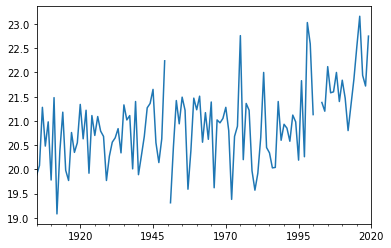

In [44]:
import matplotlib.pyplot as plt

air["SEP"].plot()

plt.show()

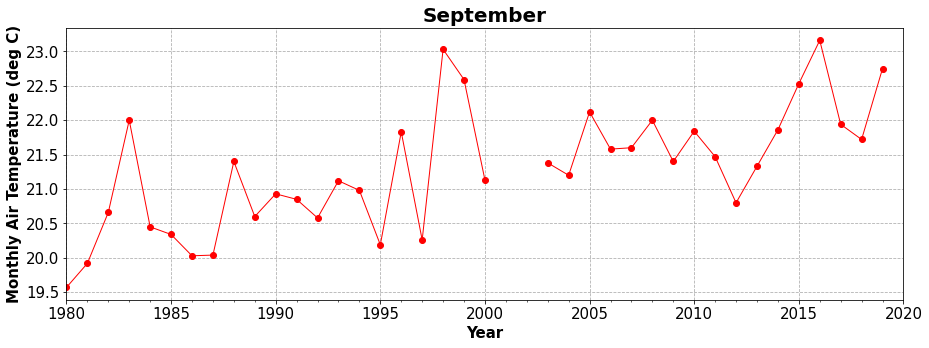

In [45]:
plt.figure(figsize = (15, 5))

air.loc["1980" :, "SEP"].plot(c = "r", lw = 1, marker = "o", )
plt.grid(ls = "--")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Year", fontsize = 15, weight = "bold")
plt.ylabel("Monthly Air Temperature (deg C)", fontsize = 15, weight = "bold")
plt.title("September", fontsize = 20, weight = "bold")

plt.show()

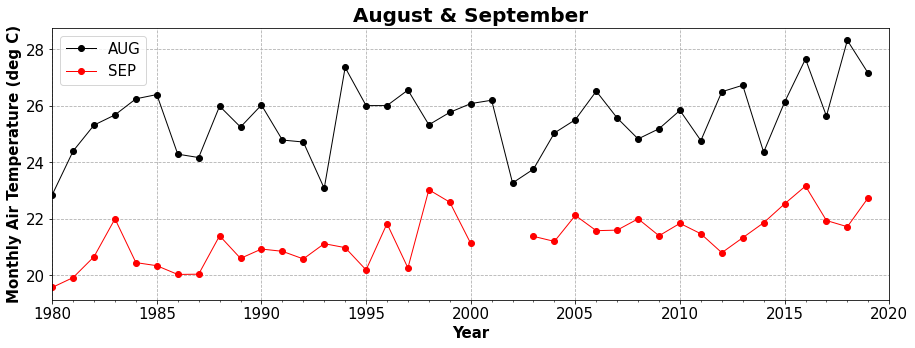

In [46]:
plt.figure(figsize = (15, 5))

air.loc["1980" :, "AUG"].plot(c = "k", lw = 1, marker = "o")
air.loc["1980" :, "SEP"].plot(c = "r", lw = 1, marker = "o")
plt.grid(ls = "--")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Year", fontsize = 15, weight = "bold")
plt.ylabel("Monthly Air Temperature (deg C)", fontsize = 15, weight = "bold")
plt.title("August & September", fontsize = 20, weight = "bold")
plt.legend(fontsize = 15)

plt.show()

In [47]:
air10 = air.resample("10A", closed = "left", label = "left").mean()

print(air10)

                 JAN    FEB    MAR        APR     MAY       JUN        JUL  \
1905-12-31 -2.259000 -1.890  3.250   9.750000  14.800  19.62000  23.390000   
1915-12-31 -4.117000 -1.447  2.973   9.973000  14.973  19.83300  23.853000   
1925-12-31 -3.931000 -2.010  3.239   9.769000  15.509  20.14900  24.069000   
1935-12-31 -4.385000 -1.655  3.995  10.005000  15.415  20.23500  24.545000   
1945-12-31 -2.819000 -1.167  3.598  10.830000  15.929  19.97125  24.106667   
1955-12-31 -3.656000 -0.708  4.298  10.571000  16.271  20.47700  24.422000   
1965-12-31 -2.485000 -1.297  3.450  10.546000  16.246  20.02700  23.880000   
1975-12-31 -3.135000 -1.004  4.751  11.010000  16.180  20.86900  24.139000   
1985-12-31 -2.341000  0.070  4.820  11.208000  16.325  20.73200  24.130000   
1995-12-31 -2.077000  0.806  5.782  11.787778  16.769  21.34600  24.396000   
2005-12-31 -1.855000  0.579  5.521  11.368000  16.976  21.40400  23.762000   
2015-12-31 -0.916667  0.850  6.575  12.500000  17.760  21.97000 

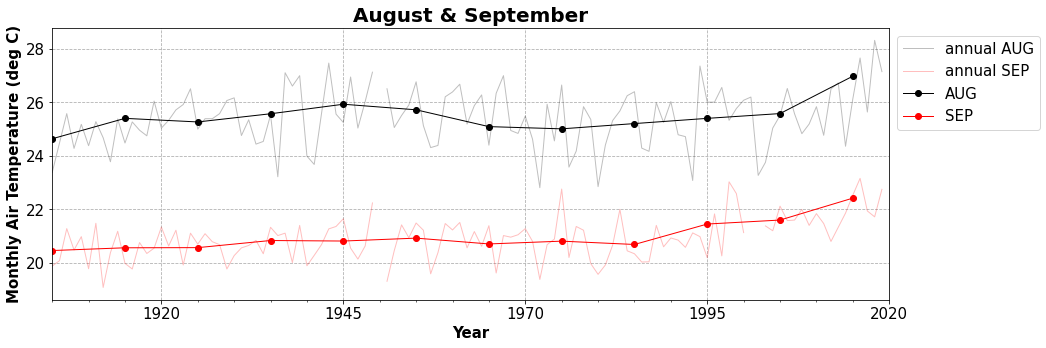

In [48]:
plt.figure(figsize = (15, 5))

air["AUG"].plot(c = "k", lw = 1, alpha = 0.25, label = "annual AUG")
air["SEP"].plot(c = "r", lw = 1, alpha = 0.25, label = "annual SEP")

air10["AUG"].plot(c = "k", lw = 1, marker = "o")
air10["SEP"].plot(c = "r", lw = 1, marker = "o")
plt.grid(ls = "--")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Year", fontsize = 15, weight = "bold")
plt.ylabel("Monthly Air Temperature (deg C)", fontsize = 15, weight = "bold")
plt.title("August & September", fontsize = 20, weight = "bold")
plt.legend(fontsize = 15, loc = "upper left", bbox_to_anchor = (1, 1, 0, 0))

plt.show()